In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Instance-Based Learning

In [2]:
# Loading the Iris dataset
iris = datasets.load_iris()
classes = iris.target_names
X = iris.data[:, :2]  # Using only sepal length and sepal width for 2D visualization
y = iris.target

In [3]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

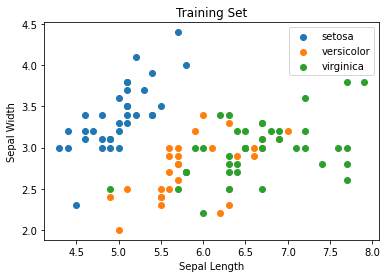

In [4]:
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], label=iris.target_names[label])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Training Set')
plt.legend()
plt.show()

In [5]:
# Nearest Neighbors
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)  

KNeighborsClassifier(n_neighbors=1)

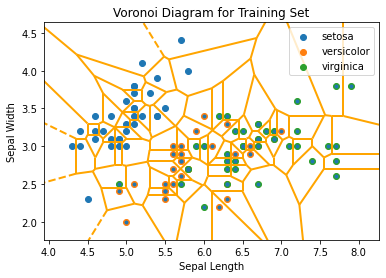

In [6]:
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], label=iris.target_names[label])
vor = Voronoi(X_train)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Voronoi Diagram for Training Set')
plt.legend()
plt.show()

In [7]:
X_t = np.array([3.5,5.5])
knn.predict(X_t.reshape(1,-1))

array([0])

In [8]:
classes[0]

'setosa'

In [9]:
knn.predict(X_test)

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0,
       0])

In [10]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [11]:
# Calculating accuracy for k-NN model
knn_accuracy = knn.score(X_test, y_test)
print("Accuracy: ", knn_accuracy)

Accuracy:  0.7333333333333333


In [12]:
# Nearest Neighbors
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
# Calculating accuracy for k-NN model
knn_accuracy = knn.score(X_test, y_test)
print("Accuracy: ", knn_accuracy)

Accuracy:  0.7333333333333333


In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# Loading the Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [14]:
# Splitting the Breast Cancer dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

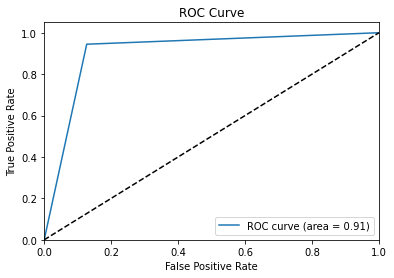

In [15]:
from sklearn.metrics import roc_curve,auc
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
knn.score(X_test,y_test)

0.9181286549707602

In [17]:
### CHOOSING BEST K

error_rate=[]

for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0.5, 1.0, 'Error Rate vs K')

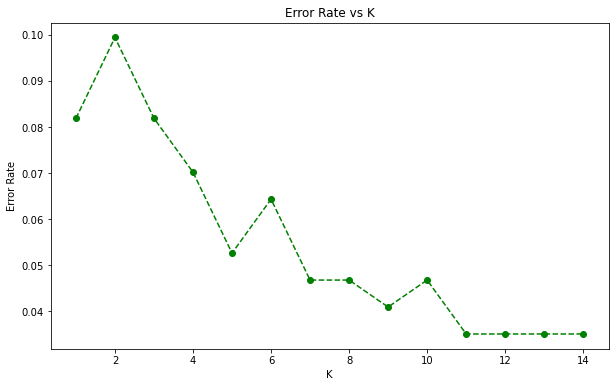

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color="green",linestyle="dashed",marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")

In [19]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [20]:
predictions=knn.predict(X_test)
knn.score(X_test,y_test)

0.9649122807017544

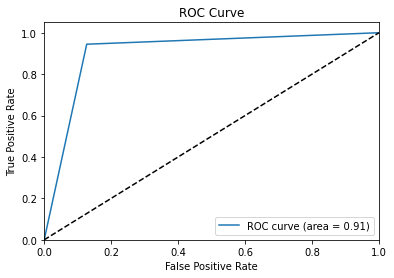

In [21]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Creating a DataFrame for the Breast Cancer dataset
cancer_df = pd.DataFrame(X, columns=breast_cancer.feature_names)
cancer_df['target'] = y

cancer_df.head()  # Displaying the first few rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
###create instance
scaler =StandardScaler()
#scale it
scaler.fit(cancer_df.drop("target",axis=1))
###tranform the variables 
df_feat=scaler.transform(cancer_df.drop("target",axis=1))

In [24]:
###put it the data frame
df_feat=pd.DataFrame(df_feat,columns=cancer_df.columns[:-1])

In [25]:
### train
x_train, x_test, y_train, y_test = train_test_split(df_feat,cancer_df["target"], test_size=0.30, random_state=0)

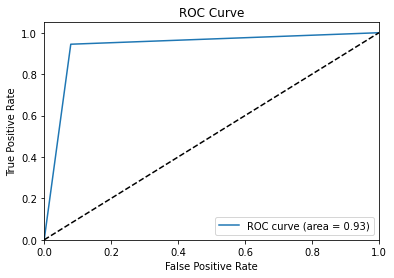

In [26]:
from sklearn.metrics import roc_curve,auc
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
fpr,tpr,_=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
knn.score(x_test,y_test)

0.935672514619883

In [28]:
### CHOOSING BEST K

error_rate=[]

for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    error_rate.append(knn.score(x_train,y_train))

Text(0.5, 1.0, 'Error Rate vs K')

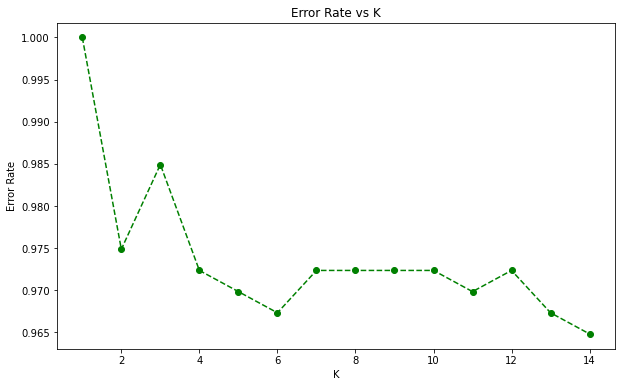

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color="green",linestyle="dashed",marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")

In [30]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
predictions=knn.predict(x_test)
knn.score(x_test,y_test)

0.9532163742690059

### Regression

In [32]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [33]:
# Loading the Boston housing dataset
boston = pd.read_csv('../data/BostonHousing.csv')

In [34]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
# Selecting 'RM' (average number of rooms per dwelling) as the feature
X_rm = boston[['rm']]
y_boston = boston[['medv']]

In [36]:
# Splitting the dataset into training and test sets
X_train_rm, X_test_rm, y_train_rm, y_test_rm = train_test_split(X_rm, y_boston, test_size=0.3, random_state=0)

In [37]:
# Creating and training the linear regression model
lr = LinearRegression()
lr.fit(X_train_rm, y_train_rm)

LinearRegression()

In [38]:
# Predicting on the test set
y_pred_rm = lr.predict(X_test_rm)

In [39]:
# Calculating the model performance
mse = mean_squared_error(y_test_rm, y_pred_rm)
r2 = r2_score(y_test_rm, y_pred_rm)

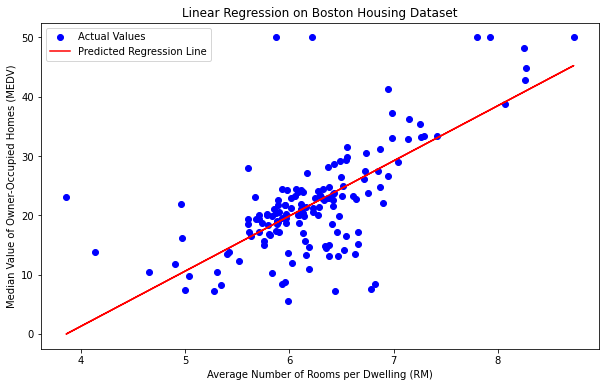

In [41]:
# Correcting the plot by converting X_test_rm to a 1D array
plt.figure(figsize=(10, 6))
plt.scatter(X_test_rm['rm'], y_test_rm, color='blue', label='Actual Values')  # X_test_rm is now a 1D array
plt.plot(X_test_rm['rm'], y_pred_rm, color='red', label='Predicted Regression Line')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

In [42]:
mse, r2

(47.03304747975518, 0.43514364832115193)

In [43]:
import statsmodels.api as sm

In [44]:
# Adding a constant to the model (intercept)
X_train_rm_const = sm.add_constant(X_train_rm)

# Fitting the OLS model
ols_model = sm.OLS(y_train_rm, X_train_rm_const).fit()

# Getting the summary of the regression
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     355.8
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.45e-55
Time:                        18:56:33   Log-Likelihood:                -1164.5
No. Observations:                 354   AIC:                             2333.
Df Residuals:                     352   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.9943      3.133    -11.487      0.000     -42.157     -29.832
rm             9.3113      0.494     18.861      0.000       8.340      10.282
==============================================================================
Omnibus:                       75.533   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.691
Skew:                           0.685   Prob(JB):                    2.56e-110
Kurtosis:                       8.687   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients:
Intercept (const): The model's intercept is approximately -35.99. This is the predicted value of 'MEDV' when 'RM' is 0.
RM: The coefficient for 'RM' is around 9.31. This means that for each additional room, the median home value is expected to increase by approximately 9.31 units.
R-squared: The R-squared value is 0.503, suggesting that about 50.3% of the variance in 'MEDV' is explained by 'RM'. This is a measure of the model's goodness of fit.

F-statistic and Prob (F-statistic): The F-statistic value is 355.8 with a very low p-value (Prob (F-statistic)), indicating that the model is statistically significant.

P>|t|: The p-values for the intercept and 'RM' are very small, suggesting that these coefficients are statistically significant.

Confidence Interval: The 95% confidence intervals for the coefficients indicate the range within which these coefficients are likely to fall.

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf  

In [ ]:
boston['price'] = pd.DataFrame(y_boston)

In [48]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [49]:
formula = 'medv ~ C(rm) + I(crim**2)'
bst_ols = smf.ols(formula, data=boston)

# Fit the model
results = bst_ols.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2.793
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.69e-06
Time:                        18:57:56   Log-Likelihood:                -1056.9
No. Observations:                 506   AIC:                             3008.
Df Residuals:                      59   BIC:                             4897.
Df Model:                         446                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.5623      5.722      4.